In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
#Dependent and independent features
#input data
x = df[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']

In [7]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


<Axes: xlabel='Exited', ylabel='count'>

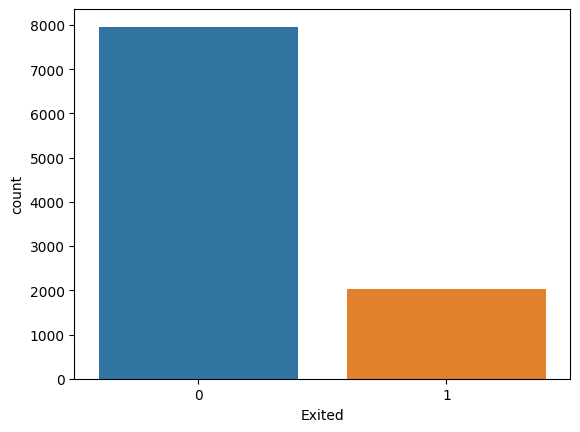

In [8]:
sns.countplot(x = y)
# 0 is normal state and 1 is abnormal

In [9]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
x_scaled = scaler.fit_transform(x)

In [13]:
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [14]:
# cross Validation
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [16]:
x.shape

(10000, 8)

In [17]:
x_test.shape

(2500, 8)

In [18]:
x_train.shape

(7500, 8)

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
# we have taken three hidden layers with 100 neurons in each layer
ann = MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=0, max_iter=100, activation='relu')
# we have used RELU(Rectified linear units - linear activation function)

In [21]:
# total 5 layer (1 input, 1 output, 3 hidden), input layer has 8 neurons(bcz 8 features are used as input(x) and output has one nueron bcz of binary classification)
ann.fit(x_train, y_train)

C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [22]:
y_pred = ann.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [24]:
y_test.value_counts()

Exited
0    1991
1     509
Name: count, dtype: int64

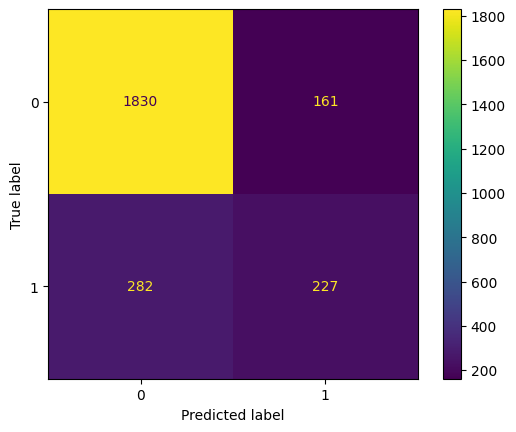

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [26]:
accuracy_score(y_test, y_pred)

0.8228

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1991
           1       0.59      0.45      0.51       509

    accuracy                           0.82      2500
   macro avg       0.73      0.68      0.70      2500
weighted avg       0.81      0.82      0.81      2500



In [28]:
# we have recall for class 1 to low(0.45) we have increase it or balance recall of both 0 and 1

In [29]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [30]:
# Above recall is less due to  1 class is far less in number
# We can increase its number using imbalanced-learn package
# This package increases/reduces the entries for given class
# using random over_sampling you can increase the entries in the class and using random-under_sampling you can lower the class entries
from imblearn.over_sampling import RandomOverSampler

In [31]:
ros = RandomOverSampler(random_state=0)

In [32]:
x_res, y_res = ros.fit_resample(x, y)

In [33]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [34]:
x_scaled = scaler.fit_transform(x_res)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_res, random_state=0, test_size=0.25)

In [36]:
ann2 = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu',max_iter=100, random_state=0)

In [37]:
ann2.fit(x_train, y_train)

C:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [38]:
y_pred = ann2.predict(x_test)

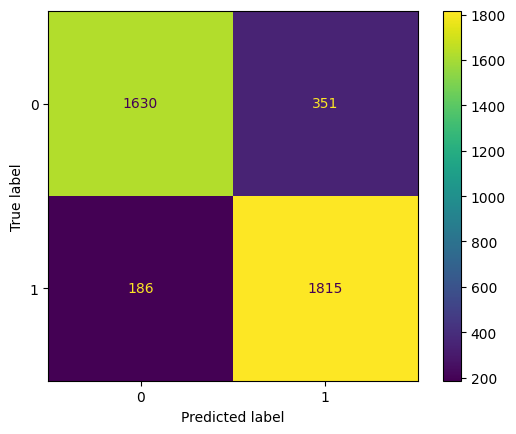

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [40]:
accuracy_score(y_test, y_pred)

0.865143144148669

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1981
           1       0.84      0.91      0.87      2001

    accuracy                           0.87      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.87      0.86      3982



In [42]:
#improved the recall of 1